# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

# Phase II Revisions


Use the following cell (or more if you need them) to make any needed revisions or additions to your Phase II data cleaning. If you were not recommended to make any changes, and don't have any new data sources for Phase III, you may skip this part.


In [1]:
def data_cleaning():
  pass





############ Function Call ############
data_cleaning()

## Data Sources
Include sources (as links) to your datasets. Add any additional data sources if needed. Clearly indicate if a data source is different from one submitted in your Phase I, as we will check that it satisfies the requirements.
*   Downloaded Dataset Source: (same as Phase I) <br>
https://data.world/typhon/billboard-hot-100-songs-2000-2018-w-spotify-data-lyrics/workspace/file?filename=billboard_2000_2018_spotify_lyrics.csv
<br>
*   Web Collection #1 Source - HTML/Web-scrape: (same as Phase I) <br>
https://en.wikipedia.org/wiki/Grammy_Award_for_Record_of_the_Year
<br>
*   Web Collection #2 Source - API: (same as Phase I)<br>
https://api.spotify.com/ <br>
(This source has many additional endpoints that we will be using, this address is base for the Web API.)



## Imports

In [2]:
import csv, json, requests, re
from pprint import pprint
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import spotipy as spot

## Downloaded Dataset Requirement: CSV File

Fill in the predefined functions with your data scraping/parsing code. You may modify/rename each function as you seem fit, but you must provide at least 3 separate functions that clean each of your required datasets.


In [3]:
def data_parser(filename):
    df = pd.read_csv(filename)
    mydf = df.copy()
    pd.set_option('display.max_columns', None)
    
    mydf.drop(["simple_title", "video_link", "lyrics", "main_artist", "weeks", "last_pos", "rank", "change", "broad_genre"], inplace = True, axis = 1)
    
    mydf.replace("unknown", np.nan, inplace = True)
    
    lists = []
    for i in range(0, len(mydf)):
        a = pd.isna(mydf.loc[i,"energy":"mode"])
        if a.all() == True:
            lists.append(i)

    mydf.drop(lists, inplace = True, axis = 0)
    mydf = mydf.reset_index(drop = True)
    
        
    for i in range(0, len(mydf)):
        gen = mydf.loc[i, "genre"]
        if pd.isna(gen) == True:
            pass
        else:
            newgen = re.findall(r"'([\w\s]*)'", gen)
            mydf.loc[i, "genre"] = str(newgen)
        
        duration = mydf.loc[i, "duration_ms"]
        
        newint = int(duration)
        insec = int(newint / 1000)
        minutes = insec // 60
        seconds  = insec % 60
    
        if seconds < 10:
            seconds = "0" + str(seconds)

        final = str(minutes) + ":" + str(seconds)
        mydf.loc[i, "duration_ms"] = final
        
        art = mydf.loc[i,"artist"]
        if art.islower():
            newart = art.split()
            stringlist = [string.capitalize() for string in newart]
            newstring = " ".join(stringlist)
            mydf.loc[i,"artist"] = newstring
        else:
            pass        
        
    
    mydf = mydf.rename(columns = {"duration_ms" : "duration_min"})
    
    mydf.loc[:, "year"] = mydf.loc[:,"year"].fillna(0.0).astype(int)
    
    display(mydf)

    writer = pd.ExcelWriter("cleanedcsvData.xlsx")
    mydf.to_excel(writer)
    writer.save()

    
############ Function Call ############
data_parser("billboard_2000_2018_spotify_lyrics.csv")

,date,year,title,artist,peak_pos,spotify_link,spotify_id,genre,analysis_url,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_min,loudness,valence,mode
0,6/21/18,0,All Girls Are The Same,Juice WRLD,41,spotify:track:0XySogm94T51XF5F2jumXm,0XySogm94T51XF5F2jumXm,['rap'],https://api.spotify.com/v1/audio-analysis/0XyS...,0.529,0.0856,161.989,0.307,0.0769,0.000335,4,0.671,0,2:45,-7.226,0.203,1
1,6/21/18,0,All Mine,Kanye West,11,spotify:track:3qnoOm4fwZPBS116f5hpgF,3qnoOm4fwZPBS116f5hpgF,"['pop rap', 'rap']",https://api.spotify.com/v1/audio-analysis/3qno...,0.308,0.0933,122.099,0.338,0.125,0,4,0.925,11,2:25,-6.562,0.265,0
2,6/21/18,0,Back To You,Selena Gomez,22,spotify:track:4hQ6UGyWQIGJmHSo0J88JW,4hQ6UGyWQIGJmHSo0J88JW,"['dance pop', 'pop']",https://api.spotify.com/v1/audio-analysis/4hQ6...,0.724,0.12,102.061,0.0486,0.0945,1.68E-06,4,0.601,6,3:27,-4.856,0.508,1
3,6/21/18,0,Be Careful,Cardi B,11,spotify:track:2Yl4OmDby9iitgNWZPwxkd,2Yl4OmDby9iitgNWZPwxkd,"['pop', 'rap']",https://api.spotify.com/v1/audio-analysis/2Yl4...,0.568,0.0952,152.279,0.411,0.0256,0,4,0.82,6,3:30,-8.23,0.535,0
4,6/21/18,0,Beautiful Crazy,Luke Combs,58,spotify:track:4Qx06Fzsepmdz2NGSWfZck,4Qx06Fzsepmdz2NGSWfZck,"['contemporary country', 'country road']",https://api.spotify.com/v1/audio-analysis/4Qx0...,0.402,0.0928,103.313,0.0262,0.676,0,4,0.552,11,3:13,-7.431,0.382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7362,1/8/00,2000,All I Want For Christmas Is You,Mariah Carey,83,spotify:track:0bYg9bo50gSsH3LtXe2SQn,0bYg9bo50gSsH3LtXe2SQn,"['dance pop', 'hip pop', 'pop', 'pop rap', 'ur...",https://api.spotify.com/v1/audio-analysis/0bYg...,0.625,0.0708,150.277,0.0386,0.164,0,4,0.335,7,4:01,-7.462,0.346,1
7363,1/8/00,2000,Deck The Halls,Shedaisy,61,spotify:track:3MAQlKrBxFN5QXR7SqxYQh,3MAQlKrBxFN5QXR7SqxYQh,"['contemporary country', 'country', 'country d...",https://api.spotify.com/v1/audio-analysis/3MAQ...,0.837,0.144,118.827,0.0406,0.0195,9.12E-06,4,0.575,1,3:49,-7.141,0.444,0
7364,1/8/00,2000,I Love You,Martina Mcbride,24,spotify:track:2WNNMbA9vD52uU3N0iNBfc,2WNNMbA9vD52uU3N0iNBfc,"['contemporary country', 'country', 'country d...",https://api.spotify.com/v1/audio-analysis/2WNN...,0.586,0.132,106.754,0.0254,0.0338,0,4,0.687,0,2:52,-5.991,0.732,1
7365,1/8/00,2000,Left & Right,D'angelo,70,spotify:track:4EQ0dK6Sg7v685NGrQvuki,4EQ0dK6Sg7v685NGrQvuki,"['funk', 'hip hop', 'neo soul', 'soul', 'urban...",https://api.spotify.com/v1/audio-analysis/4EQ0...,0.405,0.383,92.115,0.644,0.235,0,4,0.838,1,4:46,-9.684,0.843,1


## Web Collection Requirement \#1: HTML/Web-scrape


In [4]:
def web_parser1(url):
  res = requests.get(url)
  html_page = res.content
  soup = BeautifulSoup(html_page, "html.parser")
  all_tables = soup.find_all("table", {"class": "wikitable"})
  table_2000s = all_tables[5]
  
  songs = []

  pattern = r'>([\s\w\'\.!\(\)\?\*\&\-]*)<\/a>'
  for table in table_2000s:
    for row in table:
      i = 0
      for td in row:
        if i == 1:
          song = re.findall(pattern, str(td))
          if song is not None and len(song) > 0:
            songs.append(song[0])
        i += 1
  for song in songs: 
    if song[0] == '2':
      songs.remove(song)

  artists = []
  pattern = r'>([\s\w\'\.!\(\)\?\*\&\-]*)<\/a>'
  for row in table:
      i = 0
      for td in row:
        if i == 3:
          artist = re.findall(pattern, str(td))
          if artist is not None and len(artist)>0:
            artists.append(artist[0])
        i += 1

  years = []
  for i in range(0, 10): 
    for j in range(5):
      if j == 0:
        years.append("200" + str(i) + "*")
      else:
        years.append("200" + str(i))


  table_2010s = all_tables[6]

  pattern = r'>([\s\w\'\.!\(\)\?\*\&\-]*)<\/a>'
  for table in table_2010s:
    for row in table:
      i = 0
      for td in row:
        if i == 1:
          song = re.findall(pattern, str(td))
          if song is not None and len(song) > 0:
            songs.append(song[0])
        i += 1
  for song in songs: 
    if song[0] == '2':
      songs.remove(song)

  pattern = r'>([\s\w\'\.!\(\)\?\*\&\-%\;]*)<\/a>'
  for row in table:
      i = 0
      for td in row:
        if i == 3:
          artist = re.findall(pattern, str(td))
          if artist is not None and len(artist)>0:
            artists.append(artist[0])
        i += 1

  for i in range(0, 10):
    if i == 3:
      for j in range(6):
        if j == 0:
          years.append("201" + str(i) + "*")
        else:
          years.append("201" + str(i))
    elif i == 9: 
      for j in range(8):
        if j == 0:
          years.append("201" + str(i) + "*")
        else:
          years.append("201" + str(i))
    else:
      for j in range(5):
        if j == 0:
          years.append("201" + str(i) + "*")
        else:
          years.append("201" + str(i))

  pd.set_option('display.max_rows', None) 
  df = pd.DataFrame(
    {'Year': years,
     'Song': songs,
     'Artist': artists
    })

  df.replace("Mumford &amp; Sons", "Mumford & Sons", inplace = True)
  df.replace("D'Angelo &amp; The Vanguard", "D'Angelo & The Vanguard", inplace = True)  

  ifwon = []
  for i in range(0, len(df)):
    a = df.loc[i,"Year"]
    if a[-1] == "*":
      ifwon.append("Winner")
    else:
      ifwon.append("Nominee")
  
  df["Result"] = ifwon
  
  for index,row in df.iterrows():
        if "*" in row["Year"]:
            df.replace(row["Year"], row["Year"][0:4], inplace = True)  
      
  display(df)

  writer = pd.ExcelWriter("cleanedHTMLData.xlsx")
  df.to_excel(writer)
  writer.save()


############ Function Call ############
url = 'https://en.wikipedia.org/wiki/Grammy_Award_for_Record_of_the_Year'
web_parser1(url)

,Year,Song,Artist,Result
0,2000,Smooth,Santana,Winner
1,2000,Believe,Cher,Nominee
2,2000,I Want It That Way,Backstreet Boys,Nominee
3,2000,Livin' la Vida Loca,Ricky Martin,Nominee
4,2000,No Scrubs,TLC,Nominee
5,2001,Beautiful Day,U2,Winner
6,2001,Bye Bye Bye,*NSYNC,Nominee
7,2001,I Try,Macy Gray,Nominee
8,2001,Music,Madonna,Nominee
9,2001,Say My Name,Destiny's Child,Nominee


## Web Collection Requirement \#2: API

In [5]:
def web_parser2(playlist_link):
    from spotipy.oauth2 import SpotifyClientCredentials
    
    cid = "195a1958dab04abb8bb07e665f737847"
    secret = "fc0fe9fcdacd4d9f9fe243894aab26a0"
    
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    
    sp = spot.Spotify(client_credentials_manager = client_credentials_manager)
    
    
    url = playlist_link
    ids = re.findall(r"/([\w\d]+)\?", url)
    id = ids[0]
    
    tracks = sp.playlist_tracks(id)
    
    artist_name = []
    song_name = []
    song_ids = []
    duration_ms = []
    release_date = []
    
    for i in range(0, len(tracks["items"])):
        newid = tracks["items"][i]["track"]["id"]
        newartist = tracks["items"][i]["track"]["album"]["artists"][0]["name"]
        newduration = tracks["items"][i]["track"]["duration_ms"]
        newrelease = tracks["items"][i]["track"]["album"]["release_date"][0:4]
        newsong = tracks["items"][i]["track"]["name"]
        
        artist_name.append(newartist)
        song_name.append(newsong)
        song_ids.append(newid)
        duration_ms.append(newduration)
        release_date.append(newrelease)
        
    duration_min = []
    for i in range(0, len(duration_ms)):
        a = duration_ms[i]
        
        newint = int(a)
        insec = int(newint / 1000)
        minutes = insec // 60
        seconds  = insec % 60
    
        if seconds < 10:
            seconds = "0" + str(seconds)
        
        final = str(minutes) + ":" + str(seconds)
        duration_min.append(final)
        
    song_features = {} 
 
    for i in range(0, len(song_ids)):
        key = tracks["items"][i]["track"]["name"]
        [new_list] = sp.audio_features(song_ids[i])
        value = new_list
        song_features[key] = value 
        
    df = pd.DataFrame(song_features).transpose()
    df["artist name"] = artist_name
    df["duration"] = duration_min
    df["release date"] = release_date
    df.drop(columns = "duration_ms", inplace = True, axis = 1)
    
    display(df)
    
    writer = pd.ExcelWriter("cleanedAPIData.xlsx")
    df.to_excel(writer)
    writer.save()


############ Function Call ############
playlist_link = "https://open.spotify.com/playlist/37i9dQZF1DX0kbJZpiYdZl?si=cbb08331e58c4d93"
web_parser2(playlist_link)
  

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date
abcdefu,0.695,0.54,4,-5.692,1,0.0493,0.299,0,0.367,0.415,121.932,audio_features,4fouWK6XVHhzl78KzQ1UjL,spotify:track:4fouWK6XVHhzl78KzQ1UjL,https://api.spotify.com/v1/tracks/4fouWK6XVHhz...,https://api.spotify.com/v1/audio-analysis/4fou...,4,GAYLE,2:48,2021
INDUSTRY BABY (feat. Jack Harlow),0.736,0.704,3,-7.409,0,0.0615,0.0203,0,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,4,Lil Nas X,3:32,2021
Meet Me At Our Spot,0.773,0.47,2,-7.93,1,0.0299,0.0153,0.000193,0.0851,0.399,94.995,audio_features,07MDkzWARZaLEdKxo6yArG,spotify:track:07MDkzWARZaLEdKxo6yArG,https://api.spotify.com/v1/tracks/07MDkzWARZaL...,https://api.spotify.com/v1/audio-analysis/07MD...,4,THE ANXIETY,2:42,2020
Wandered To LA (with Justin Bieber),0.687,0.645,0,-4.761,1,0.04,0.0509,0.000003,0.106,0.424,135.083,audio_features,5J6rTmMjF9DVIAF8G3M9n4,spotify:track:5J6rTmMjF9DVIAF8G3M9n4,https://api.spotify.com/v1/tracks/5J6rTmMjF9DV...,https://api.spotify.com/v1/audio-analysis/5J6r...,4,Juice WRLD,3:09,2021
Heat Waves,0.761,0.525,11,-6.9,1,0.0944,0.44,0.000007,0.0921,0.531,80.87,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,4,Glass Animals,3:58,2020
Better Days (NEIKED x Mae Muller x Polo G),0.717,0.671,0,-5.077,0,0.0337,0.0018,0.000003,0.0921,0.699,110.054,audio_features,6f5ExP43esnvdKPddwKXJH,spotify:track:6f5ExP43esnvdKPddwKXJH,https://api.spotify.com/v1/tracks/6f5ExP43esnv...,https://api.spotify.com/v1/audio-analysis/6f5E...,4,NEIKED,2:40,2021
For Tonight,0.442,0.517,9,-7.807,1,0.0548,0.0699,0,0.114,0.2,79.867,audio_features,61Emqg95O9zo1GNOcyxq4Y,spotify:track:61Emqg95O9zo1GNOcyxq4Y,https://api.spotify.com/v1/tracks/61Emqg95O9zo...,https://api.spotify.com/v1/audio-analysis/61Em...,4,Giveon,3:13,2021
Shivers,0.788,0.859,2,-2.724,1,0.0856,0.281,0,0.0424,0.822,141.02,audio_features,6bQfNiqyCX7UaQSvVVGo4I,spotify:track:6bQfNiqyCX7UaQSvVVGo4I,https://api.spotify.com/v1/tracks/6bQfNiqyCX7U...,https://api.spotify.com/v1/audio-analysis/6bQf...,4,Ed Sheeran,3:27,2021
I Hate U,0.535,0.388,7,-9.805,0,0.155,0.507,0,0.11,0.412,106.703,audio_features,5dXWFMwD7I7zXsInONVl0H,spotify:track:5dXWFMwD7I7zXsInONVl0H,https://api.spotify.com/v1/tracks/5dXWFMwD7I7z...,https://api.spotify.com/v1/audio-analysis/5dXW...,5,SZA,2:54,2021
STAY (with Justin Bieber),0.591,0.764,1,-5.484,1,0.0483,0.0383,0,0.103,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,4,The Kid LAROI,2:21,2021


# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

## Import Statements

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
import getpass

In [7]:
df = pd.read_excel("cleanedcsvData.xlsx")
df2 = pd.read_excel("cleanedHTMLData.xlsx")
df3 = pd.read_excel("cleanedAPIData.xlsx", index_col=0)

billboardDF = df.copy()
billboardDF = billboardDF.iloc[:, 1:]

grammyDF = df2.copy()
grammyDF = grammyDF.iloc[:, 1:]

playlistDF = df3.copy()


# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseIII.ipynb and your Python GUI file.

## 1.Insights
* **1.1 Historically, do songs of shorter or longer length win the award?**
* **1.2 Does a specific genre tend to have more record of the year wins than other genres?**
* **1.3 Does a song's popularity guarantee is a record of the year nomination or win?**
* **1.4 What general trends do the features of songs that are either nominees or winners follow?**
* **1.5 Of Spotify's Top Hits playlist, which songs are most likely to be nominated for the awrad or even win?**

In [ ]:
def grammyspotify():
    #display(grammyDF)
    
    from spotipy.oauth2 import SpotifyClientCredentials
    
    cid = "195a1958dab04abb8bb07e665f737847"
    secret = "fc0fe9fcdacd4d9f9fe243894aab26a0"
    
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    
    sp = spot.Spotify(client_credentials_manager = client_credentials_manager)
    
    winnersname = []
    winnersartist = []
    nomineename = []
    nomineeartist = []
    for i in range(0, len(grammyDF)):
        result = grammyDF.loc[i, "Result"]
        if result == "Winner":
            winnersname.append(grammyDF.loc[i, "Song"])
            winnersartist.append(grammyDF.loc[i, "Artist"])   
        else:
            nomineename.append(grammyDF.loc[i, "Song"])
            nomineeartist.append(grammyDF.loc[i, "Artist"])
    
    winnersnamelower = [x.lower() for x in winnersname]
    nomineenamelower = [x.lower() for x in nomineename]
    
    winnerartistids = []
    winnerartistname = []
    for i in range(0, len(winnersartist)):
        results = sp.search(q='artist:' + winnersartist[i], type='artist')
        
        for j in range(0, len(results['artists']['items'])):
            if results['artists']['items'][j]["name"] == winnersartist[i]:
                artistid = results["artists"]["items"][j]["id"]
                artistname = results["artists"]["items"][j]["name"]
                winnerartistids.append(artistid)
                winnerartistname.append(artistname)
                
                break
    
    
    winnersongname = []
    winnersongid = []
    songs = []
    for i in range(0, len(winnerartistids)):
        artistalbums = sp.artist_albums(winnerartistids[i])
        
        
        albumids = []
        albumnames = []
        
        for j in range(0, len(artistalbums["items"])):
            #return(artistalbums["items"])
            newname = artistalbums["items"][j]["name"]
            newid = artistalbums["items"][j]["id"]
            
            if newname in albumnames:
                pass
            else:
                albumids.append(newid)
                albumnames.append(newname)
    
            
        songname = []
        for k in range(0, len(albumids)):
            albumtracks = sp.album_tracks(albumids[k])
            
            
            for p in range(0, len(albumtracks["items"])):
                songname = albumtracks["items"][p]["name"]
                songid = albumtracks["items"][p]["id"]
                
                songtup = (songname,songid)
                songs.append(songtup)           
        
    
    for i in songs:
        if i[0].lower() in winnersnamelower: 
            if i[0] not in winnersongname:
                for j in winnersname:
                    if i[0] == j:
                        winnersongname.append(i[0])
                        winnersongid.append(i[1])
                     
        
    #############################################################
    
    nomineeartistids = []
    nomineeartistname = []
    for i in range(0, len(nomineeartist)):
        results = sp.search(q='artist:' + nomineeartist[i], type='artist')
        
        for j in range(0, len(results['artists']['items'])):
            if results['artists']['items'][j]["name"] == nomineeartist[i]:
                artistid = results["artists"]["items"][j]["id"]
                artistname = results["artists"]["items"][j]["name"]
                nomineeartistids.append(artistid)
                nomineeartistname.append(artistname)
                
                break
    
    
    nomineesongname = []
    nomineesongid = []
    songs = []
    for i in range(0, len(nomineeartistids)):
        artistalbums = sp.artist_albums(nomineeartistids[i])
        
        
        albumids = []
        albumnames = []
        
        for j in range(0, len(artistalbums["items"])):
            #return(artistalbums["items"])
            newname = artistalbums["items"][j]["name"]
            newid = artistalbums["items"][j]["id"]
            
            if newname in albumnames:
                pass
            else:
                albumids.append(newid)
                albumnames.append(newname)
    
            
        songname = []
        for k in range(0, len(albumids)):
            albumtracks = sp.album_tracks(albumids[k])
            
            
            for p in range(0, len(albumtracks["items"])):
                songname = albumtracks["items"][p]["name"]
                songid = albumtracks["items"][p]["id"]
                
                songtup = (songname,songid)
                songs.append(songtup)           
        
    
    for i in songs:
        if i[0].lower() in nomineenamelower: 
            if i[0] not in nomineesongname:
                for j in nomineename:
                    if i[0] == j:
                        nomineesongname.append(i[0])
                        nomineesongid.append(i[1])
    
    
    winner = pd.DataFrame({"Title": winnersongname, "ID": winnersongid})
    nominee = pd.DataFrame({"Title": nomineesongname, "ID": nomineesongid})
    
    
    writer = pd.ExcelWriter("winnerData.xlsx")
    winner.to_excel(writer)
    writer.save()
    
    writer = pd.ExcelWriter("nomineeData.xlsx")
    nominee.to_excel(writer)
    writer.save()
    
    




############ Function Call ############
grammyspotify()

In [9]:
winnerDF = pd.read_excel("winnerData.xlsx")
nomineeDF = pd.read_excel("nomineeData.xlsx")

winners = winnerDF.copy()
winners = winners.iloc[:,1:]
nominees = nomineeDF.copy()
nominees = nominees.iloc[:,1:]
display(winners)

,Title,ID
0,Beautiful Day,4Zs5xEJPV6rWxkLoS5NaT1
1,Walk On,0Nq65oeVtmBZTpazxKliN3
2,Don't Know Why,2lyUpqcguweKjaO9duN7C9
3,Here We Go Again,3BlfbXVK543G3sMCtXpX2I
4,Rehab,1L5tZi0izXsi5Kk5OJf4W0
5,Use Somebody,2TYC9SaRhYypUQzB1ZVTG2
6,Need You Now,5VPi9ZXztW0db7xP6FcO9n
7,Hello,2eEVAV5qmHmvqEtEzPvd6q
8,Rolling in the Deep,7ampXjVdiWFwlTsCGFFpKQ
9,Somebody That I Used to Know,07M9wjdkx8ue3eDayzzSk5


## 1.1 Historically, do songs of shorter or longer length win the award?
* What is the average length of a song that has been nominated?</br>
* What is the average length of a song that won?</br>
* What is the distribution of the length of songs that have won or been nominated?</br>

,Winners,Nominees
Mean,231.636364,228.309091
Median,230.000000,221.000000
Standard Deviation,29.648854,35.613602


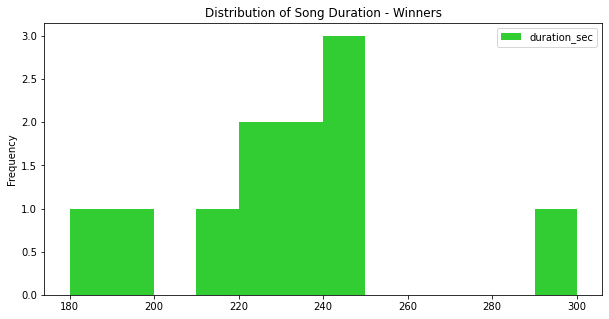

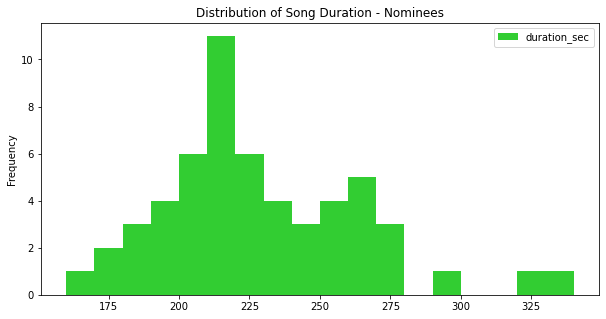

In [10]:
def insight1():
    
    from spotipy.oauth2 import SpotifyClientCredentials
    
    cid = "195a1958dab04abb8bb07e665f737847"
    secret = "fc0fe9fcdacd4d9f9fe243894aab26a0"
    
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    
    sp = spot.Spotify(client_credentials_manager = client_credentials_manager)

    # winners:
    
    song_features = {} 
    
    for i in range(0, len(winners.loc[:, "ID"])):
        key = winners.loc[i, "Title"]
        [new_list] = sp.audio_features(winners.loc[i, "ID"])
        value = new_list
        song_features[key] = value
        
    df = pd.DataFrame(song_features).transpose()
    df = df.reset_index(drop = True)
    
    df.drop(["analysis_url", "type", "track_href", "uri"], inplace = True, axis = 1)
    
    
    for i in range(0, len(df.loc[:, "duration_ms"])):
        
        duration = df.loc[i, "duration_ms"]
        
        newint = int(duration)
        insec = int(newint / 1000)
        df.loc[i, "duration_ms"] = insec

    df = df.rename(columns = {"duration_ms" : "duration_sec"})
    
    results = pd.concat([winners, df.reindex(winners.index)], axis=1)
    
    # nominees:
    
    song_features = {} 
    
    for i in range(0, len(nominees.loc[:, "ID"])):
        key = nominees.loc[i, "Title"]
        [new_list] = sp.audio_features(nominees.loc[i, "ID"])
        value = new_list
        song_features[key] = value
        
    df2 = pd.DataFrame(song_features).transpose()
    df2 = df2.reset_index(drop = True)
    
    
    df2.drop(["analysis_url", "type", "track_href", "uri"], inplace = True, axis = 1)
    
    
    for i in range(0, len(df2.loc[:, "duration_ms"])):
        
        duration = df2.loc[i, "duration_ms"]
        
        newint = int(duration)
        insec = int(newint / 1000)
        df2.loc[i, "duration_ms"] = insec

    df2 = df2.rename(columns = {"duration_ms" : "duration_sec"})
    
    results2 = pd.concat([nominees, df2.reindex(nominees.index)], axis=1)
    
    
    # calculations:
    
    wduravg = df["duration_sec"].mean()
    nomduravg = df2["duration_sec"].mean()
    
    wdurmed = df["duration_sec"].median()
    nomdurmed = df2["duration_sec"].median()
    
    wdurstd = df["duration_sec"].std()
    nomdurstd = df2["duration_sec"].std()
    
    sortedwinners = results.sort_values(by="duration_sec", ascending = True)
    sortednominees = results2.sort_values(by="duration_sec", ascending = True)
    
        
    resultDF = pd.DataFrame([[wduravg,nomduravg],[wdurmed, nomdurmed], [wdurstd, nomdurstd]], index=["Mean", "Median", "Standard Deviation"], columns=["Winners", "Nominees"])
    
    display(resultDF)
    
    # visualization:
    
    plt.rcParams["figure.figsize"] = [10, 5.0]
    winnerplot = sortedwinners.plot(kind="hist", y="duration_sec", bins = 12, range = (180,300), 
                                    color = "limegreen", title = "Distribution of Song Duration - Winners")
    plt.savefig("Distribution of Song Duration - Winners")
    plt.show()
    
    plt.rcParams["figure.figsize"] = [10, 5.0]
    nomineeplot = sortednominees.plot(kind="hist", y="duration_sec", bins = 18, range = (160,340),
                                      color = "limegreen", title = "Distribution of Song Duration - Nominees")
    plt.savefig("Distribution of Song Duration - Nominees")
    plt.show()
    

    

############ Function Call ############
insight1()

### Insight 1 Explanation

* **Relevance**:</br>
    In order for our prediction to be accurate, it is important to evaluate the different factors and elements of a song. One such element is the duration of a song. Because of the competitive nature of the Grammys, we can see if there is any bias regarding the length of a song. If a shorter song is more poised to win Record of the Year over a longer song, or vice versa, we can see whether or not the songs in Spotify's Top Hits Playlist could win or be nominated for Record of the Year.</br>
* **Presentation**:</br>
    The dataframe returned by this function shows the mean, median, and standard deviation of the song duration of songs that have been nominated for or won Record of the Year from 2000-201 onwards. The first graph below the dataframe displays the distribution of song duration for winners. The second histogram displays the distribution of song duration for nominated songs. Below that, the counts for each histogram are listed in order to make the values more clear.</br>
* **Analysis**:</br>
    Since there were a limited number of songs to analyze for the winners, the spread may not be entirely indicative of the results with a larger sample size. If we were to extrapolate, the plot could have a bell-shape, but we do not know for sure. Nevertheless, most of the songs that won fall into the 240 - 250 second range, so around 4:00 to 4:10. The shortest song fell into the 180-190 second range, and the longest song fell into the 290 - 300 second range. For the histogram with the data for the songs that were nominated but did not win, the data near the center follows a bell-shaped curve but is skewed to the right. Most of the nominated songs fall into the 210 - 220 second range, so 3:30 to 3:40 minutes. The shortest song falls into the 160-170 second range, and the longest song falls into the 330-340 second range. This songs length is shorter than what we found with the songs that won. The overall range of values is also larger for the histogram with only nominated songs. The median song length of the nominated songs is smaller than the mean, indiciating the data is skewed as the histogram shows. The mean and the median are close in values for the songs that won. The average song length for songs that won and were nominated are very close in value.</br>
    </br>
    Based on these values, it seems that an ideal nomination for Record of the Year falls in in the 220 - 240 second range, or 3:40 to 4:00 minute range. This is because we accounted for the larger sample size of nominated songs and the fact that the averages of both categories were similar. It also seems that an ideal candidate to win Record of the Year has a duration of 230 seconds, or 3:50 minutes, which accounts for the averages for both categories.</br>

,genre_count
pop,42
dance pop,34
hip pop,11
neo mellow,10
hip hop,9
pop rock,8
neo soul,8
europop,4
country road,3
contemporary country,3


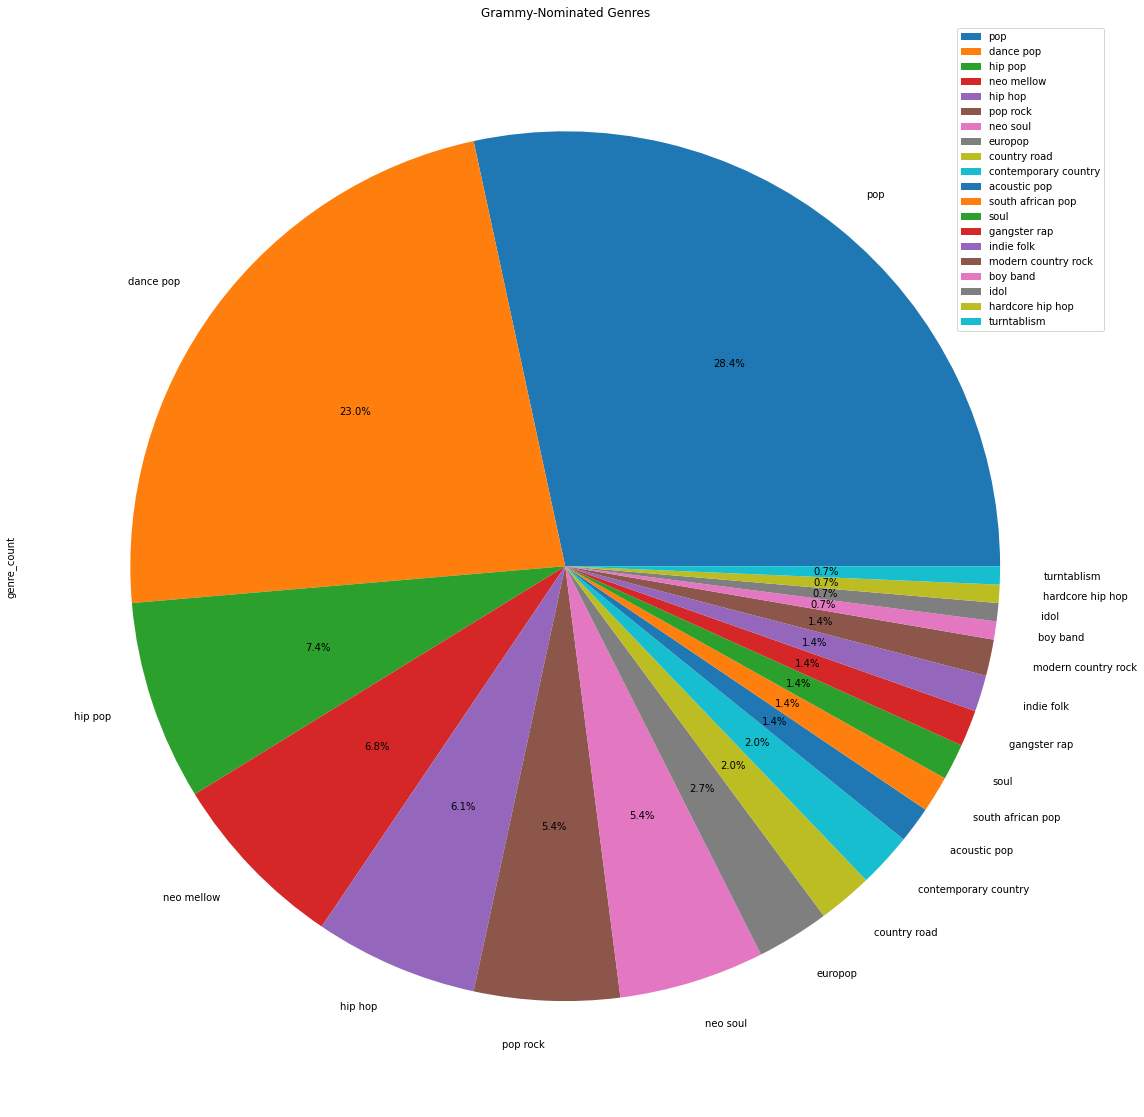

In [11]:
def insight2():

    mydf = pd.read_excel("cleanedcsvData.xlsx") 
    mydf.drop(["date", "year", "peak_pos", "spotify_link", "spotify_id", 
               "analysis_url", "speechiness", "acousticness", "instrumentalness", "time_signature", 
               "danceability", "key", "duration_min", "loudness", "valence", "mode", "energy", 
               "liveness", "tempo", "artist"], axis = 1, inplace = True)
    
    # If the genre column is empty, drop the row for the genre analysis. 
    
    indexNames = mydf[mydf['genre'] == '[]'].index
    mydf.drop(indexNames, inplace=True)
    indexNames = mydf[mydf['genre'] == 'nan'].index
    mydf.drop(indexNames, inplace=True)
    
    myhtml = pd.read_excel("cleanedHTMLData.xlsx")
    
    grammybillboard = pd.merge(myhtml, mydf, left_on = 'Song', right_on = 'title')
    grammybillboard.drop_duplicates(subset = "title", keep = 'first', inplace = True, ignore_index = True)
    grammybillboard.drop(["title", "Year", "Unnamed: 0_y", "Unnamed: 0_x"], axis = 1, inplace = True)
    grammybillboard.dropna(inplace = True)
    
    genredict = {}
    genrelist = []
    
    for index, value in grammybillboard["genre"].items():
        listofgenres = value.split(",")
        for genre in listofgenres: 
            genre = genre.strip(",")
            genre = genre.strip(" ")
            genre = genre.strip("[")
            genre = genre.strip("]")
            genre = genre.strip("'")
            genrelist.append(genre)
        
    for genre in genrelist: 
        if genre not in genredict: 
            genredict[genre] = 1
        else: 
            genredict[genre] +=1
    
    genredf = pd.DataFrame.from_dict(genredict, orient = 'index').head(20)
    genredf.rename(columns = {0: "genre_count"}, inplace = True)
    genredf.sort_values(by = ["genre_count"], inplace = True, ascending = False)
    display(genredf)
    
    pieplot = genredf.plot(kind = 'pie', y = 'genre_count', title = "Grammy-Nominated Genres", 
                           autopct='%1.1f%%', figsize = (110,20))
    pieplot.legend(loc='upper right')
    plt.show()
    






############ Function Call ############
insight2()

### Insight 2 Explanation

Does a specific genre tend to have more record of the year nominations? 

* <b> Relevance: </b> Knowing which genres are most nominated for record of the year will allow us to predict which current top hit songs may be Grammy nominated in the future based on which genres these top songs fall in.
*<b> Presentation:</b> The function returns a dataframe containing the number of songs that fall under each genre. The songs are from the Grammy-nominated songs from 2000-2018 (scraped from the Wikipedia page for 'Record of the Year'). This data is visualized in the piechart, which breaks down the various genres Grammy-nominated songs fall under by percent. 
* <b>Analysis:</b> From the dataframe and piechart, it is apparent that "pop" is the most common genre with 42 songs, making up 28.4% of the Grammy nominated songs (that are also Billboard charted). "Dance pop" follows close behind at 23%. An interesting observation is that 6.8% of Grammy-nominated songs fall in the "neo mellow" genre, something to consider when predicting current hits. Songs that fall under the genres "pop" and "dance pop" are most likely to receive Grammy nominations, closely followed by hip pop and neo mellow. 


## 1.3 Does a song's popularity guarantee it a Record of the Year nomination or win?
* What is the range of peak positions of songs that have been nominated for or won a Record of the Year Award on the Billboard chart?</br>
* What is the average peak position of a song that won?</br>
* What is the average peak position of a song that was nominated?</br>

,Name,Peak Position,Spotify ID
0,24K Magic,4,6b8Be6ljOzmkOmFslEb23P
1,Hello,1,1MDoll6jK4rrk2BcFRP5i7
2,Somebody That I Used To Know,1,4wCmqSrbyCgxEXROQE6vtV
3,Rolling In The Deep,1,1CkvWZme3pRgbzaxZnTl5X
4,Use Somebody,4,5VGlqQANWDKJFl0MBG3sg2
5,Rehab,9,1EXAqr4fceDPYlL6XeMi2g
6,Don't Know Why,30,6ybViy2qrO9sIi41EgRJgx
7,Beautiful Day,21,1VuBmEauSZywQVtqbxNqka


,Name,Peak Position,Spotify ID
0,God's Plan,1,6DCZcSspjsKoFjzjrWoCdn
1,Despacito,1,6rPO02ozF3bM7NnOV4h6s2
2,Humble.,1,7KXjTSCq5nL1LoYtL7XAwS
3,Rockstar,1,0OAAAdiHJKa2wlCKqaYXV7
4,Redbone,12,3kxfsdsCpFgN412fpnW85Y
5,Work,1,50R3hdsZQeg3k8zJdVphSZ
6,7 Years,2,7129iqBafaphfc3WPCGC0L
7,Stressed Out,2,3CRDbSIZ4r5MsZ0YwxuEkn
8,Formation,10,0VCZ8tS4za4kEwJHbMNVnY
9,Can't Feel My Face,1,3X38ErFiKgzUxinBlhwuWm


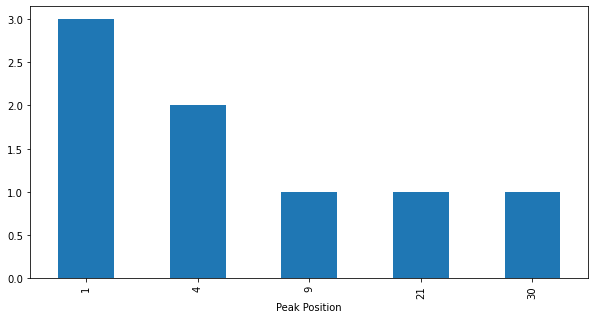

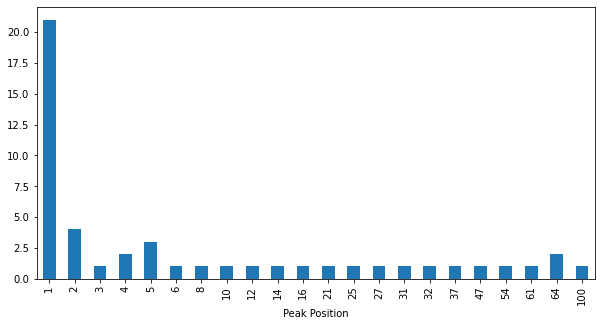

,Winners,Nominees
Mean,8.875000,13.959184
Median,4.000000,2.000000
Standard Deviation,10.868533,22.167881


In [12]:
def insight3():
    #display(billboard)
    
    from spotipy.oauth2 import SpotifyClientCredentials
    
    cid = "195a1958dab04abb8bb07e665f737847"
    secret = "fc0fe9fcdacd4d9f9fe243894aab26a0"
    
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    
    sp = spot.Spotify(client_credentials_manager = client_credentials_manager)
    
    winnersname = []
    winnersartist = []
    nomineename = []
    nomineeartist = []
    for i in range(0, len(grammyDF)):
        result = grammyDF.loc[i, "Result"]
        if result == "Winner":
            winnersname.append(grammyDF.loc[i, "Song"])
            winnersartist.append(grammyDF.loc[i, "Artist"])   
        else:
            nomineename.append(grammyDF.loc[i, "Song"])
            nomineeartist.append(grammyDF.loc[i, "Artist"])
            
    
    billboard = billboardDF.drop(["date", "year", "artist", "spotify_link", "genre", "analysis_url", "energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "time_signature", "danceability", "key", "duration_min", "loudness", "valence", "mode"], axis = 1)
    billboard2 = billboard.copy()
    
    # winners:
    
    winners = winnerDF.copy()
    winners = winners.iloc[:,1:]

    winnersnamelist = winners.loc[:, "Title"].tolist()
    winnersnamelower = [x.lower() for x in winnersnamelist]
    
    #winnersartistlist = winners.loc[:, "Artist"].tolist()
    winnersartistlower = [x.lower() for x in winnersartist]

    
    lists = []
    for i in range(0, len(billboard.loc[:, "title"])):
        a = billboard.loc[i, "title"]
        if a.lower() not in winnersnamelower:
            lists.append(i)

    billboard.drop(lists, inplace = True, axis = 0)
    billboard = billboard.reset_index(drop = True)
    
    
    lists = []
    for i in range(0, len(billboard.loc[:, "spotify_id"])):
        newtrack = sp.track(billboard.loc[i, "spotify_id"])
        artist = newtrack["album"]["artists"][0]["name"]
        if artist.lower() not in winnersartistlower:
            lists.append(i)
            
    billboard.drop(lists, inplace = True, axis = 0)
    
    titlelower = [x.lower() for x in billboard.loc[:,"title"]]
    indexlist = []
    peak_pos = billboard.loc[:, "peak_pos"].tolist()
    spotify_id = billboard.loc[:, "spotify_id"].tolist()
    title = billboard.loc[:, "title"].tolist()

    
    for i in range(0, len(title)-1):
        titlelist = False
        spotifylist = False
        if title[i] in title[i+1:]:
            titlelist = True
        if spotify_id[i] in spotify_id[i+1:]:
            spotifylist = True
        if i not in indexlist and titlelist and spotifylist:
            if peak_pos[i] > peak_pos[i+1]:
                indexlist.append(i)
            elif peak_pos[i] < peak_pos[i+1]:
                indexlist.append(i+1)
            else:
                indexlist.append(i)
    
    for i in range(0, len(titlelower)-1):
        titlematch = False
        artistmatch = False
        if titlelower[i] in titlelower[i+1:]:
            titlematch = True
        track = sp.track(spotify_id[i])
        track1 = sp.track(spotify_id[i+1])
        artist = track["album"]["artists"][0]["name"]
        artist1 = track1["album"]["artists"][0]["name"]
        if artist == artist1:
            artistmatch = True
        if i not in indexlist and titlematch and artistmatch:
            if peak_pos[i] > peak_pos[i+1]:
                indexlist.append(i)
            elif peak_pos[i] < peak_pos[i+1]:
                indexlist.append(i+1)
            else:
                indexlist.append(i)
    newtitle = []
    peak = []
    spotify = []

    for i in range(0, len(titlelower)):
        if i not in indexlist:
            newtitle.append(title[i])
            peak.append(peak_pos[i])
            spotify.append(spotify_id[i])
    
    data = list(zip(newtitle,peak,spotify))
    
    resultDF2 = pd.DataFrame(data, columns=["Name", "Peak Position", "Spotify ID"])            
    
    display(resultDF2)
    
    # nominees:
    
    nominees = nomineeDF.copy()
    nominees = nominees.iloc[:,1:]
    
    nomineesnamelist = nominees.loc[:, "Title"].tolist()
    nomineesnamelower = [x.lower() for x in nomineesnamelist]
    
    nomineesartistlower = [x.lower() for x in nomineeartist]

    
    lists = []
    for i in range(0, len(billboard2.loc[:, "title"])):
        a = billboard2.loc[i, "title"]
        if a.lower() not in nomineesnamelower:
            lists.append(i)

    billboard2.drop(lists, inplace = True, axis = 0)
    billboard2 = billboard2.reset_index(drop = True)
    
    
    lists = []
    for i in range(0, len(billboard2.loc[:, "spotify_id"])):
        newtrack = sp.track(billboard2.loc[i, "spotify_id"])
        artist = newtrack["album"]["artists"][0]["name"]
        if artist.lower() not in nomineesartistlower:
            lists.append(i)
            
    billboard2.drop(lists, inplace = True, axis = 0)
    billboard2 = billboard2.reset_index(drop = True)
    
    
    title = billboard2.loc[:, "title"].tolist()
    peak_pos = billboard2.loc[:, "peak_pos"].tolist()
    spotify_id = billboard2.loc[:, "spotify_id"].tolist()
    
    
    
    newtitle = []
    peak = []
    spotify = []
    indexlist = []
    
    for i in range(0, len(titlelower)-1):
        titlematch = False
        artistmatch = False
        if titlelower[i] in titlelower[i+1:]:
            titlematch = True
        track = sp.track(spotify_id[i])
        track1 = sp.track(spotify_id[i+1])
        artist = track["album"]["artists"][0]["name"]
        artist1 = track1["album"]["artists"][0]["name"]
        if artist == artist1:
            artistmatch = True
        if i not in indexlist and titlematch and artistmatch:
            if peak_pos[i] > peak_pos[i+1]:
                indexlist.append(i)
            elif peak_pos[i] < peak_pos[i+1]:
                indexlist.append(i+1)
            else:
                indexlist.append(i)
    
    for i in range(0, len(title)-1):
        titlelist = False
        spotifylist = False
        if title[i] in title[i+1:]:
            titlelist = True
        if spotify_id[i] in spotify_id[i+1:]:
            spotifylist = True
        if i not in indexlist and titlelist and spotifylist:
            if peak_pos[i] > peak_pos[i+1]:
                indexlist.append(i)
            elif peak_pos[i] < peak_pos[i+1]:
                indexlist.append(i+1)
            else:
                indexlist.append(i)
    
    for i in range(0, len(title)):
        if i not in indexlist:
            newtitle.append(title[i])
            peak.append(peak_pos[i])
            spotify.append(spotify_id[i])
    
    data = list(zip(newtitle,peak,spotify))
    
    resultDF = pd.DataFrame(data, columns=["Name", "Peak Position", "Spotify ID"])
    
    display(resultDF)
    
    # calculations:
    
    winavg = resultDF2["Peak Position"].mean()
    nomavg = resultDF["Peak Position"].mean()
    
    winmed = resultDF2["Peak Position"].median()
    nommed = resultDF["Peak Position"].median()
    
    winstd = resultDF2["Peak Position"].std()
    nomstd = resultDF["Peak Position"].std()
    
    # visualization:
    

    plt.rcParams["figure.figsize"] = [10, 5.0]
    winnerplot = resultDF2.groupby("Peak Position").size().plot.bar()
    plt.savefig("Distribution of Peak Position - Winners")
    plt.show()
    
    plt.rcParams["figure.figsize"] = [10, 5.0]
    nomineeplot = resultDF.groupby("Peak Position").size().plot.bar()
    plt.savefig("Distribution of Peak Position - Nominees")
    plt.show()

    
    # results df:
    
    resultDF = pd.DataFrame([[winavg,nomavg],[winmed, nommed], [winstd, nomstd]], index=["Mean", "Median", "Standard Deviation"], columns=["Winners", "Nominees"])
    display(resultDF)
    
############ Function Call ############
insight3()

### Insight 3 Explanation

* **Relevance**:</br>
    It is important to analyze the popularity of a song to be able to make predictions of the Spotify Top Hits playlist. Since we will be predicting using a playlist prioritizing popularity, we can see if our the Spotify Top Hits playlist is a valid and reasonable playlist to analyze for Record of the Year nominations and wins.</br>
* **Presentation**:</br>
    The two graphs returned by this function show the frequency of the peak position of songs on the Billboard Chart. The first graph shows the results for songs that won Record of the Year, and the second graph shows the results for the songs that were nominated but did not win. The dataframe returned by this function shows the mean, median, and standard deviation of the peak positions of songs that have been nominated for or won Record of the Year from 200-2018. T</br>
* **Analysis**:</br>
    From both the dataframe and the graphs, we see that the peak position of 1 is the most frequent. This supports the idea that the Spotify Top Hits playlist is a sound playlist to perform our predictions on. As the sample size of nominated songs increases, the median gets closer to 1. The distance between the mean and the median also increases which indicates that data is skewed as supposed by the graphs.</br>

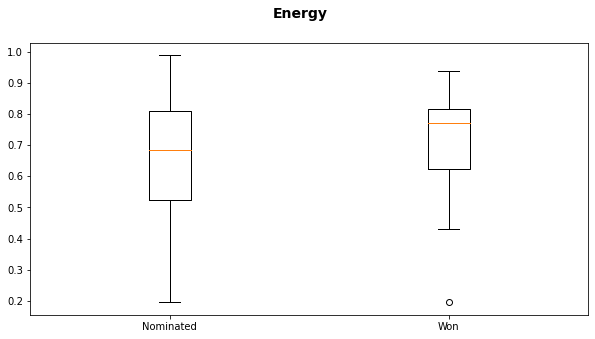

0.29


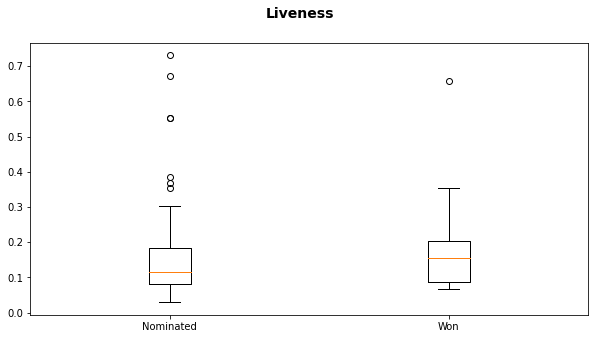

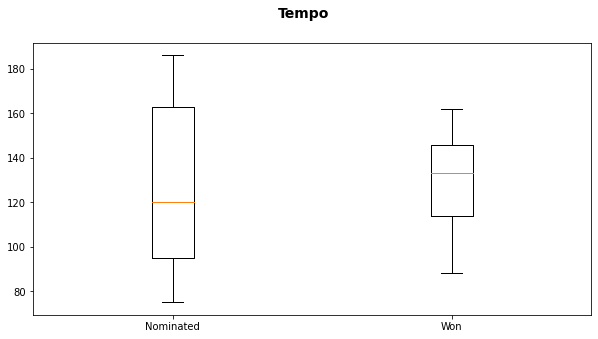

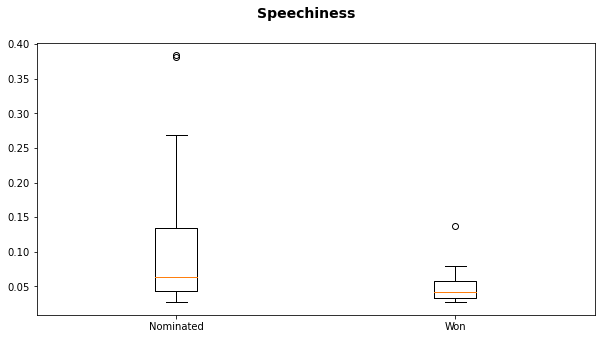

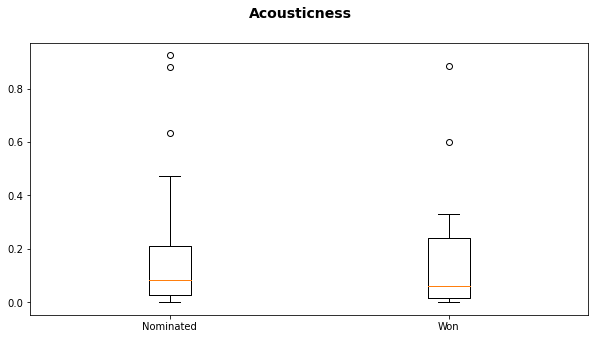

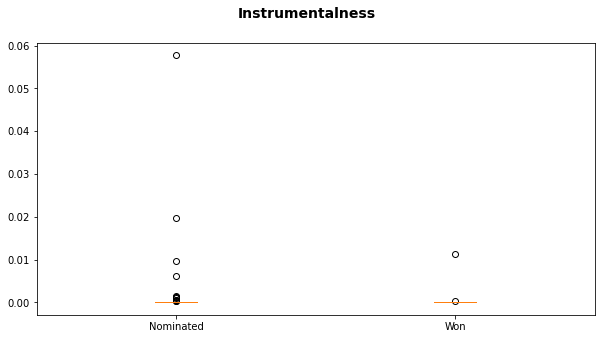

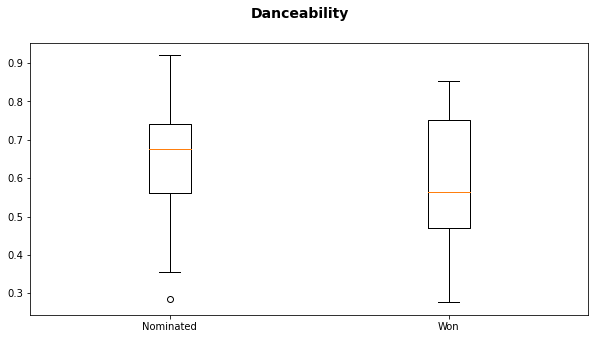

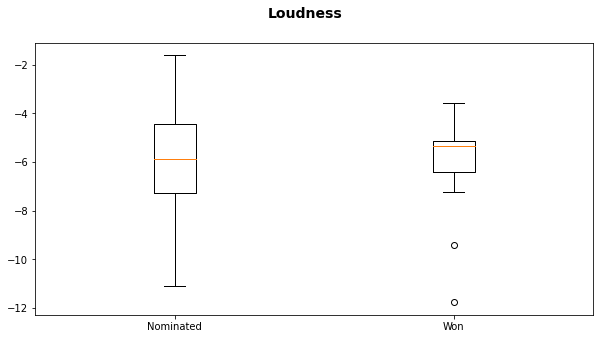

In [13]:
dfwin_copy = None

def insight4():
    
    
    mydf = pd.read_excel("cleanedcsvData.xlsx") 
    mydf.drop(["date", "year", "peak_pos", "spotify_link", "spotify_id", "analysis_url", "time_signature", "key", "duration_min", "valence", "mode"], axis = 1, inplace = True)
    mydf.drop(["Unnamed: 0", "genre", "artist"], axis = 1, inplace = True)
    
    myhtml = pd.read_excel("cleanedHTMLData.xlsx")
    
    grammybillboard = pd.merge(myhtml, mydf, left_on = 'Song', right_on = 'title')
    grammybillboard.drop_duplicates(subset = "title", keep = 'first', inplace = True, ignore_index = True)
    grammybillboard.drop(["title", "Year"], axis = 1, inplace = True)
    
    
    dfnom = grammybillboard.loc[grammybillboard['Result'] == 'Nominee']
    dfwin = grammybillboard.loc[grammybillboard['Result'] == 'Winner']
    
    global dfwin_copy
    dfwin_copy = dfwin.copy()
    
    fig = plt.figure()
    fig.suptitle('Energy', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["energy"], dfwin["energy"]], labels = ["Nominated", "Won"])
    plt.show()
    
    quartile_1 = np.round(dfnom["energy"].quantile(0.25), 2)
    quartile_3 = np.round(dfnom["energy"].quantile(0.75), 2)
    iqr = np.round(quartile_3 - quartile_1, 2)
    print(iqr)
    
    fig = plt.figure()
    fig.suptitle('Liveness', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["liveness"], dfwin["liveness"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Tempo', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["tempo"], dfwin["tempo"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Speechiness', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["speechiness"], dfwin["speechiness"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Acousticness', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["acousticness"], dfwin["acousticness"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Instrumentalness', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["instrumentalness"], dfwin["instrumentalness"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Danceability', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["danceability"], dfwin["danceability"]], labels = ["Nominated", "Won"])
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Loudness', fontsize=14, fontweight='bold')
    plt.boxplot([dfnom["loudness"], dfwin["loudness"]], labels = ["Nominated", "Won"])
    plt.show()
    

    
############ Function Call ############
insight4()

### Insight 4 Explanation

What general trends do the features (such as energy, tempo, etc.) of songs that are either nominees or winners follow? 

* <b> Relevance: </b> We can use how the features of Grammy-winners vs. Grammy-nominees compare to help us predict whether current songs from Spotify's Top Hits have the features to win a Grammy. 
* <b> Presentation: </b> The function plots 2 box-and-whisker plots for each of the following features: energy, liveness, tempo, speechiness, acousticness, instrumentalness, danceability, and loudness. The two boxplots represent each feature for (1) the nominated songs and (2) the winning songs so the feature can be compared. 
* <b>Analysis:</b> From the energy boxplot, it appears that Grammy-winning songs are more energetic than those nominated; the median energy is higher for the winning songs. For liveness, the nominated songs have more higher outliers than than the winning songs, indicating that songs with very high liveness values tend to not win Grammys. For the tempo boxplot, the interquartile range of tempo values that win Grammys is around 117-145, while the nominated songs have a much larger interquartile range, indicating that songs within that winning range are more likely to win Record of the Year. Similarly, the interquartile range for the winners for speechiness is much smaller than the IQR for the nominated songs. For acousticness and instrumentalness, both boxplots have relatively similar medians and IQRs, suggesting that acousticness and instrumentalness do not have a significant impact on whether a nominated song wins Record of the Year. In terms of danceability, winning songs have a lower median of around 0.55 compared to the median of the nominated songs (around 0.68). However, the IQR for winning songs is larger than that for nominated songs, indicating that songs with a danceability of anywhere between around 0.48 to 0.76 have a fair shot of winning. Finally, louder songs tend to win Record of the Year more, with the median for winning songs being approx. -5 (rather than nominated songs, which have a median of -6). However, I observe in the boxplot that there are a few outlier songs that have won Record of the Year despite being significantly less loud than the average. 


In [14]:
def insight5():
    
    playlistDF = df3.copy()
    
    playlistDF.drop(["type", "uri", "track_href", "analysis_url"], inplace = True, axis = 1)

    playlist = playlistDF.reset_index()
    playlist = playlist.rename(columns={"index":"name"})
    
    for i in range(0, len(playlist.iloc[:, 15])):
        a = playlist.iloc[i,15]
        b = a.split(":")
        seconds = ((int(b[0]))*60)+(int(b[1]))
        playlist.iloc[i, 15] = seconds
    
    durationindex = []
    for i in range(0, len(playlist.iloc[:, 15])):
        a = playlist.iloc[i,15]
        minimum = False
        maximum = False
        if a >= 220:
            minimum = True
        if a <= 240:
            maximum = True
        if minimum and maximum:
            durationindex.append(i)
    
    namelist = []
    durationlist = []
    songid = []
    
    for i in range(0, len(playlist.loc[:, "duration"])):
        if i in durationindex:
            namelist.append(playlist.loc[i, "name"])
            durationlist.append(playlist.loc[i, "duration"])
            songid.append(playlist.loc[i, "id"])
    
    data = list(zip(namelist,durationlist,songid))
    
    resultDF = pd.DataFrame(data, columns=["Name", "Duration", "Spotify ID"])
    
    display(resultDF)
    
    currentdf = pd.read_excel("cleanedAPIData.xlsx") 
    
    features = ["energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "danceability", "loudness"]
    dict_iqr = {}
    
    for feature in features: 
        quartile_1 = np.round(dfwin_copy[feature].quantile(0.25), 2)
        quartile_3 = np.round(dfwin_copy[feature].quantile(0.75), 2)
        dict_iqr[feature] = (quartile_1, quartile_3)
    
    energydf = currentdf.loc[(currentdf["energy"] >= dict_iqr["energy"][0]) & (currentdf["energy"] <= dict_iqr["energy"][1])]
    livenessdf = currentdf.loc[(currentdf["liveness"] >= dict_iqr["liveness"][0]) & (currentdf["liveness"] <= dict_iqr["liveness"][1])]
    tempodf = currentdf.loc[(currentdf["tempo"] >= dict_iqr["tempo"][0]) & (currentdf["tempo"] <= dict_iqr["tempo"][1])]
    speechinessdf = currentdf.loc[(currentdf["speechiness"] >= dict_iqr["speechiness"][0]) & (currentdf["speechiness"] <= dict_iqr["speechiness"][1])]
    acousticnessdf = currentdf.loc[(currentdf["acousticness"] >= dict_iqr["acousticness"][0]) & (currentdf["acousticness"] <= dict_iqr["acousticness"][1])]
    instrumentalnessdf = currentdf.loc[(currentdf["instrumentalness"] >= dict_iqr["instrumentalness"][0]) & (currentdf["instrumentalness"] <= dict_iqr["instrumentalness"][1])]
    danceabilitydf = currentdf.loc[(currentdf["danceability"] >= dict_iqr["danceability"][0]) & (currentdf["danceability"] <= dict_iqr["danceability"][1])]
    loudnessdf = currentdf.loc[(currentdf["loudness"] >= dict_iqr["loudness"][0]) & (currentdf["loudness"] <= dict_iqr["loudness"][1])]
    
    insightsdf = pd.merge(energydf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(livenessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(tempodf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(speechinessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(acousticnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(instrumentalnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(danceabilitydf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)
    
    insightsdf = pd.merge(loudnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf)


############ Function Call ############
insight5()

,Name,Duration,Spotify ID
0,Heat Waves,238,6CDzDgIUqeDY5g8ujExx2f
1,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
2,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
3,My Universe,228,3FeVmId7tL5YN8B7R3imoM
4,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
5,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
6,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
7,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
8,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA
9,Praise God,226,0WSEq9Ko4kFPt8yo3ICd6T


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
2,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Heat Waves,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,4,Glass Animals,3:58,2020,Heat Waves,238,6CDzDgIUqeDY5g8ujExx2f
1,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.1300,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.4430,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,It'll Be Okay,0.398,0.286,7,-11.881,1,0.0330,0.61600,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,4,Shawn Mendes,3:42,2021,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.1090,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.133,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.000000,0.293,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
2,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.04690,0.000031,0.364,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
3,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.105,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA
4,Praise God,0.798,0.545,1,-6.466,1,0.1680,0.00904,0.000095,0.258,0.212,118.029,audio_features,0WSEq9Ko4kFPt8yo3ICd6T,spotify:track:0WSEq9Ko4kFPt8yo3ICd6T,https://api.spotify.com/v1/tracks/0WSEq9Ko4kFP...,https://api.spotify.com/v1/audio-analysis/0WSE...,4,Kanye West,3:46,2021,Praise God,226,0WSEq9Ko4kFPt8yo3ICd6T


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.000000,0.0264,0.5500,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.4430,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
2,It'll Be Okay,0.398,0.286,7,-11.881,1,0.0330,0.61600,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,4,Shawn Mendes,3:42,2021,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
3,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.04690,0.000031,0.3640,0.5910,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.1090,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.0910,0.000000,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,MERCEDES,0.547,0.619,3,-6.485,0,0.1320,0.0951,0.000003,0.0716,0.519,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,4,Brent Faiyaz,3:53,2021,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
2,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.1700,0.000000,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
3,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.0,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.000000,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,MERCEDES,0.547,0.619,3,-6.485,0,0.1320,0.09510,0.000003,0.0716,0.519,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,4,Brent Faiyaz,3:53,2021,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
4,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.000000,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
5,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.200,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
1,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.293,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk


### Insight 5 Explanation

* <b> Relevance: </b> Using all of our insights (1-4), we can make conclusions about whether or not songs in the Spotify Top Hits playlists are candidates for nominations or wins for a Grammy Record of the Year award.

* <b> Presentation: </b> The function displays dataframes that show the summary results for the insights that we analyzed. We looked at song duration, and the general features of the songs in the playlist. We already established the soundness of the playlist in insight 3. The first dataframe shows songs that fall in the nomination interval established in insight 1. The function also displays dataframes that show which songs from the "Current Hits" playlist are in the IQR range found for each feature. These IQR ranges for each feature are from the "winning" boxplots for Insight 4. There are 8 dataframes, one for each feature. Each dataframe includes the songs that fall in the "winning" boxplot IQR for that feature. </br>

* <b>Analysis:</b> From the song duration dataframe, we see that there are 9 songs that could earn a nomination. They all have song durations that fall within the interval found in insight 1. As explained earlier, most of the nominated songs fell in this interval. It was also established that the ideal winner for a Grammy would have a song length of 230 seconds. The song swith the closest duration to this values are Bad Habits, at a length of 231 seconds, and No Love, also at a duration of 231 seconds. Additionally, joining this dataframe of 9 songs with each of the feature dataframes allows us to see which songs both meet the ideal song duration prediction requirement as well the predicted "winning" IQR range for that specific feature. For example, for the tempo feature, we conclude that Bad Habits (which is in the joined duration and tempo dataframes) meets both the duration and tempo range requirements, making it a strong candidate to be nominated for and win Record of the Year. </br>


# Data Visualizations 
All data visualizations were done with the corresponding insights above. 

## Summary File

In [31]:
def summary1():
    
    playlistDF = df3.copy()
    
    playlistDF.drop(["type", "uri", "track_href", "analysis_url"], inplace = True, axis = 1)

    playlist = playlistDF.reset_index()
    playlist = playlist.rename(columns={"index":"name"})
    
    for i in range(0, len(playlist.iloc[:, 15])):
        a = playlist.iloc[i,15]
        b = a.split(":")
        seconds = ((int(b[0]))*60)+(int(b[1]))
        playlist.iloc[i, 15] = seconds
    
    durationindex = []
    for i in range(0, len(playlist.iloc[:, 15])):
        a = playlist.iloc[i,15]
        minimum = False
        maximum = False
        if a >= 220:
            minimum = True
        if a <= 240:
            maximum = True
        if minimum and maximum:
            durationindex.append(i)
    
    namelist = []
    durationlist = []
    songid = []
    
    for i in range(0, len(playlist.loc[:, "duration"])):
        if i in durationindex:
            namelist.append(playlist.loc[i, "name"])
            durationlist.append(playlist.loc[i, "duration"])
            songid.append(playlist.loc[i, "id"])
    
    data = list(zip(namelist,durationlist,songid))
    
    resultDF = pd.DataFrame(data, columns=["Name", "Duration", "Spotify ID"])
    
    display(resultDF)
    
    currentdf = pd.read_excel("cleanedAPIData.xlsx") 
    
    features = ["energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "danceability", "loudness"]
    dict_iqr = {}
    
    for feature in features: 
        quartile_1 = np.round(dfwin_copy[feature].quantile(0.25), 2)
        quartile_3 = np.round(dfwin_copy[feature].quantile(0.75), 2)
        dict_iqr[feature] = (quartile_1, quartile_3)
    
    energydf = currentdf.loc[(currentdf["energy"] >= dict_iqr["energy"][0]) & (currentdf["energy"] <= dict_iqr["energy"][1])]
    livenessdf = currentdf.loc[(currentdf["liveness"] >= dict_iqr["liveness"][0]) & (currentdf["liveness"] <= dict_iqr["liveness"][1])]
    tempodf = currentdf.loc[(currentdf["tempo"] >= dict_iqr["tempo"][0]) & (currentdf["tempo"] <= dict_iqr["tempo"][1])]
    speechinessdf = currentdf.loc[(currentdf["speechiness"] >= dict_iqr["speechiness"][0]) & (currentdf["speechiness"] <= dict_iqr["speechiness"][1])]
    acousticnessdf = currentdf.loc[(currentdf["acousticness"] >= dict_iqr["acousticness"][0]) & (currentdf["acousticness"] <= dict_iqr["acousticness"][1])]
    instrumentalnessdf = currentdf.loc[(currentdf["instrumentalness"] >= dict_iqr["instrumentalness"][0]) & (currentdf["instrumentalness"] <= dict_iqr["instrumentalness"][1])]
    danceabilitydf = currentdf.loc[(currentdf["danceability"] >= dict_iqr["danceability"][0]) & (currentdf["danceability"] <= dict_iqr["danceability"][1])]
    loudnessdf = currentdf.loc[(currentdf["loudness"] >= dict_iqr["loudness"][0]) & (currentdf["loudness"] <= dict_iqr["loudness"][1])]
    
    insightsdf1 = pd.merge(energydf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf1.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf1)
    
    insightsdf2 = pd.merge(livenessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf2.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf2)
    
    insightsdf3 = pd.merge(tempodf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf3.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf3)
    
    insightsdf4 = pd.merge(speechinessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf4.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf4)
    
    insightsdf5 = pd.merge(acousticnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf5.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf5)
    
    insightsdf6 = pd.merge(instrumentalnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf6.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf6)
    
    insightsdf7 = pd.merge(danceabilitydf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf7.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf7)
    
    insightsdf8 = pd.merge(loudnessdf, resultDF, left_on = 'Unnamed: 0', right_on = 'Name')
    insightsdf8.drop_duplicates(subset = "Name", keep = 'last', inplace = True, ignore_index = True)
    display(insightsdf8)
    
    #Insight 5 code repasted above to use for the following merge statements on mulitiple features. 
    #The songs outputted are in the predicted "winning" range for multiple features. 
    
    print("Danceability and Instrumentalness")
    
    newdf = pd.merge(insightsdf6, insightsdf7, left_on = 'Unnamed: 0', right_on = "Unnamed: 0")
    display(newdf)
    
    writer = pd.ExcelWriter("summary.xlsx")
    newdf.to_excel(writer, "danceabilityandinstrumentalness.xlsx")
    writer.save()
    
    print("Energy and Liveness")
    
    newdf = pd.merge(insightsdf1, insightsdf2, left_on = 'Unnamed: 0', right_on = "Unnamed: 0")
    display(newdf)
    
    writer = pd.ExcelWriter("summary.xlsx")
    newdf.to_excel(writer, "energyandliveness.xlsx")
    writer.save()
    
    
 

############ Function Call ############
summary1()

,Name,Duration,Spotify ID
0,Heat Waves,238,6CDzDgIUqeDY5g8ujExx2f
1,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
2,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
3,My Universe,228,3FeVmId7tL5YN8B7R3imoM
4,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
5,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
6,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
7,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
8,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA
9,Praise God,226,0WSEq9Ko4kFPt8yo3ICd6T


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
2,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Heat Waves,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,4,Glass Animals,3:58,2020,Heat Waves,238,6CDzDgIUqeDY5g8ujExx2f
1,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.1300,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.4430,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,It'll Be Okay,0.398,0.286,7,-11.881,1,0.0330,0.61600,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,4,Shawn Mendes,3:42,2021,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.1090,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.133,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.000000,0.293,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
2,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.04690,0.000031,0.364,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
3,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.105,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA
4,Praise God,0.798,0.545,1,-6.466,1,0.1680,0.00904,0.000095,0.258,0.212,118.029,audio_features,0WSEq9Ko4kFPt8yo3ICd6T,spotify:track:0WSEq9Ko4kFPt8yo3ICd6T,https://api.spotify.com/v1/tracks/0WSEq9Ko4kFP...,https://api.spotify.com/v1/audio-analysis/0WSE...,4,Kanye West,3:46,2021,Praise God,226,0WSEq9Ko4kFPt8yo3ICd6T


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.000000,0.0264,0.5500,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.4430,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
2,It'll Be Okay,0.398,0.286,7,-11.881,1,0.0330,0.61600,0.000146,0.0912,0.0666,78.262,audio_features,2KnLkZ3z7PO3kgVGHGqDpD,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,https://api.spotify.com/v1/tracks/2KnLkZ3z7PO3...,https://api.spotify.com/v1/audio-analysis/2KnL...,4,Shawn Mendes,3:42,2021,It'll Be Okay,222,2KnLkZ3z7PO3kgVGHGqDpD
3,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.04690,0.000031,0.3640,0.5910,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.1090,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.0910,0.000000,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
1,MERCEDES,0.547,0.619,3,-6.485,0,0.1320,0.0951,0.000003,0.0716,0.519,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,4,Brent Faiyaz,3:53,2021,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
2,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.1700,0.000000,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
3,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,4,Ed Sheeran,3:51,2021,Bad Habits,231,6PQ88X9TkUIAUIZJHW2upE


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.0,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.000000,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.000000,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,MERCEDES,0.547,0.619,3,-6.485,0,0.1320,0.09510,0.000003,0.0716,0.519,76.285,audio_features,0tkgmjBMU6qSxolAKB3f2H,spotify:track:0tkgmjBMU6qSxolAKB3f2H,https://api.spotify.com/v1/tracks/0tkgmjBMU6qS...,https://api.spotify.com/v1/audio-analysis/0tkg...,4,Brent Faiyaz,3:53,2021,MERCEDES,233,0tkgmjBMU6qSxolAKB3f2H
4,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.000000,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
5,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,artist name,duration,release date,Name,Duration,Spotify ID
0,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.200,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
1,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.293,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk


,Unnamed: 0,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,type_x,id_x,uri_x,track_href_x,analysis_url_x,time_signature_x,artist name_x,duration_x,release date_x,Name_x,Duration_x,Spotify ID_x,danceability_y,energy_y,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,type_y,id_y,uri_y,track_href_y,analysis_url_y,time_signature_y,artist name_y,duration_y,release date_y,Name_y,Duration_y,Spotify ID_y
0,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.0,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.0,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,4,Adele,3:44,2021,Easy On Me,224,0gplL1WMoJ6iYaPgMCL0gX
1,Oh My God,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX,0.534,0.725,1,-3.906,1,0.0460,0.09100,0.0,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,4,Adele,3:45,2021,Oh My God,225,3Kkjo3cT83cw09VJyrLNwX
2,My Universe,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM,0.588,0.701,9,-6.390,1,0.0402,0.00813,0.0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,4,Coldplay,3:48,2021,My Universe,228,3FeVmId7tL5YN8B7R3imoM
3,No Love (with SZA),0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk,0.707,0.618,1,-5.825,0,0.1900,0.17000,0.0,0.2930,0.517,133.876,audio_features,08SB2OtZkaliju77WYEKxk,spotify:track:08SB2OtZkaliju77WYEKxk,https://api.spotify.com/v1/tracks/08SB2OtZkali...,https://api.spotify.com/v1/audio-analysis/08SB...,4,Summer Walker,3:51,2021,No Love (with SZA),231,08SB2OtZkaliju77WYEKxk
4,Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA,0.542,0.659,8,-7.289,1,0.0389,0.00279,0.0,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,4,Swedish House Mafia,3:54,2021,Moth To A Flame (with The Weeknd),234,2gpWyfu7eZ01zzncHpxOtA


# Cited Sources

 

If you used any additional sources to complete your Data Analysis section, list them here:

 

 

*   Pandas Documentation - https://pandas.pydata.org/pandas-docs/stable/

*   Spotipy Documentation - https://spotipy.readthedocs.io/en/2.19.0/

# Video Presentation

 

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:

 

 

*   Video Presentation Link: https://youtu.be/fpNAgGddnOQ

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
